# 서울시 인구와 CCTV 설치 현황 분석 및 시각화

## 한글 폰트 설치

In [ ]:
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


##메뉴 [런타임]-[런타임 다시 시작]

## 라이브러리 포함 및 사용 글꼴 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 12
fm._rebuild()

## 'seoulCctvPopulation.xlsx' 파일 읽어오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
seoul = pd.read_excel('/gdrive/My Drive/빅데이터분석전문가과정/data/seoulCctvPopulation.xlsx')
seoul.head(3)

,Unnamed: 0,CCTV수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,80.970537,546158,541233,4925,73097,0.901754,13.383856
1,강동구,1879,112.797282,461547,457164,4383,67742,0.949632,14.677162
2,강북구,1265,131.684982,315395,311773,3622,62338,1.148401,19.765057


## 'Unnamed: 0' 칼럼을 인덱스로 사용하기

In [ ]:
guName=seoul['Unnamed: 0']
name=[name for name in guName]
del seoul['Unnamed: 0']
seoul.index=name
seoul.head()

,CCTV수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
강남구,5221,80.970537,546158,541233,4925,73097,0.901754,13.383856
강동구,1879,112.797282,461547,457164,4383,67742,0.949632,14.677162
강북구,1265,131.684982,315395,311773,3622,62338,1.148401,19.765057
강서구,1617,123.961219,593203,586936,6267,87032,1.056468,14.671537
관악구,3985,186.278736,516318,499740,16578,77341,3.210812,14.979334


## 구별 CCTV수를 가로 막대그래프로 그리기

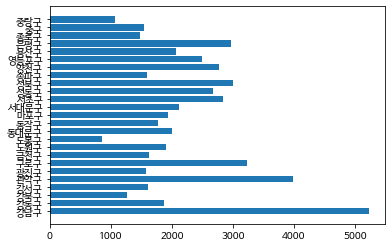

In [ ]:
plt.barh(seoul.index, seoul['CCTV수'])
plt.show()

### 그래프 크기 설정

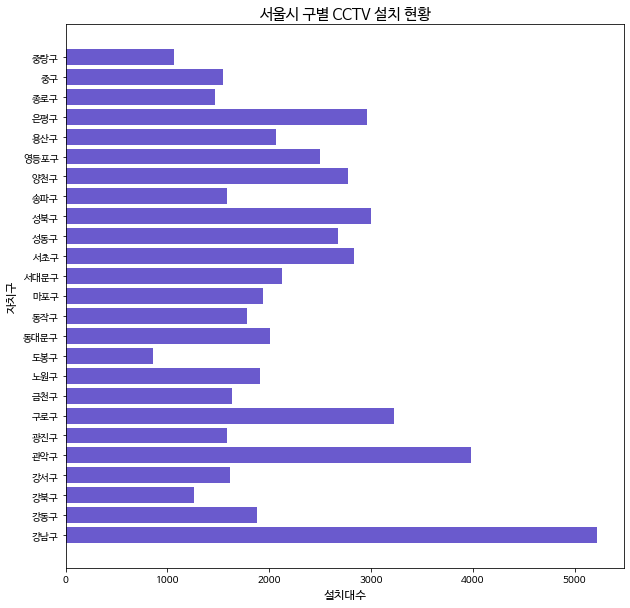

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('서울시 구별 CCTV 설치 현황', fontsize=15)
plt.ylabel('자치구', fontsize=12)
plt.xlabel('설치대수', fontsize=12)
plt.barh(seoul.index, seoul['CCTV수'], color='slateblue')
plt.show()

## CCTV 설치대수를 기준으로 오름차순 정렬된 데이터로 막대 그래프 그리기

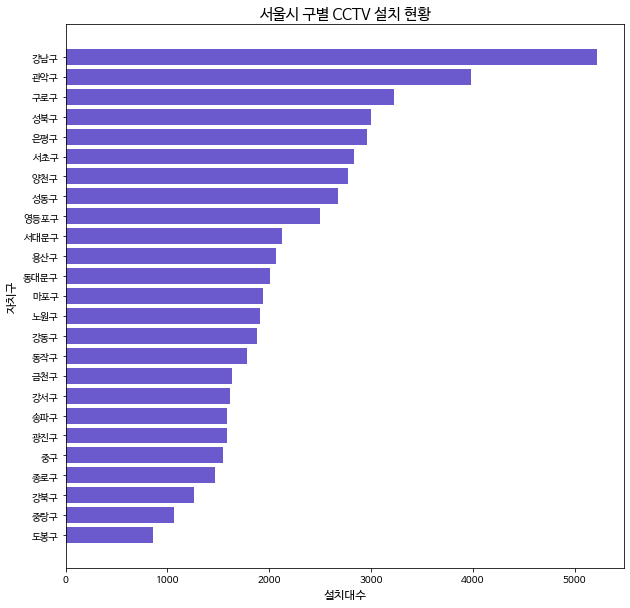

In [ ]:
sortedByCCTV = seoul.sort_values(by='CCTV수', ascending=True)
plt.figure(figsize=(10, 10))
plt.title('서울시 구별 CCTV 설치 현황', fontsize=15)
plt.ylabel('자치구', fontsize=12)
plt.xlabel('설치대수', fontsize=12)
plt.barh(sortedByCCTV.index, sortedByCCTV['CCTV수'], color='slateblue')
plt.show()

# CCTV 설치대수와 인구수의 관계 분석

## CCTV 설치대수와 인구수의 관계 분석을 위한 산점도 그리기

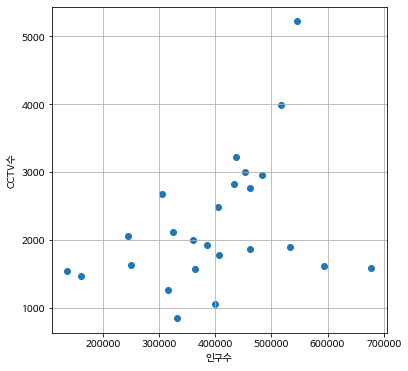

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(seoul['인구수'], seoul['CCTV수'])
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

##CCTV 설치대수와 인구수의 선형 관계 분석

In [ ]:
import numpy as np
f = np.polyfit(seoul['인구수'], seoul['CCTV수'],1)
f = np.poly1d(f)
f

poly1d([2.88508881e-03, 1.06734028e+03])

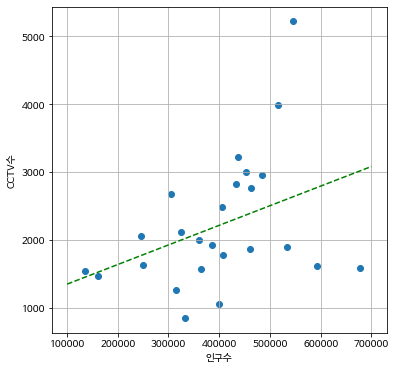

In [ ]:
x = np.linspace(100000, 700000, 100)
plt.figure(figsize=(6, 6))
plt.scatter(seoul['인구수'], seoul['CCTV수'])
plt.plot(x, f(x), 'g--')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()